# Introduction

In this project, you will build a neural network of your own design to evaluate the CIFAR-10 dataset.
Our target accuracy is 70%, but any accuracy over 50% is a great start.
Some of the benchmark results on CIFAR-10 include:

78.9% Accuracy | [Deep Belief Networks; Krizhevsky, 2010](https://www.cs.toronto.edu/~kriz/conv-cifar10-aug2010.pdf)

90.6% Accuracy | [Maxout Networks; Goodfellow et al., 2013](https://arxiv.org/pdf/1302.4389.pdf)

96.0% Accuracy | [Wide Residual Networks; Zagoruyko et al., 2016](https://arxiv.org/pdf/1605.07146.pdf)

99.0% Accuracy | [GPipe; Huang et al., 2018](https://arxiv.org/pdf/1811.06965.pdf)

98.5% Accuracy | [Rethinking Recurrent Neural Networks and other Improvements for ImageClassification; Nguyen et al., 2020](https://arxiv.org/pdf/2007.15161.pdf)

Research with this dataset is ongoing. Notably, many of these networks are quite large and quite expensive to train. 

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

Decide if you want to use the simple own model (transfer_learning=False) or the model with the transfer-learning (transfer_learning=True)

In [54]:
transfer_learning = True

## Load the Dataset

Specify your transforms as a list first.
The transforms module is already loaded as `transforms`.

CIFAR-10 is fortunately included in the torchvision module.
Then, you can create your dataset using the `CIFAR10` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/docs/stable/torchvision/datasets.html#cifar)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [55]:
# Define transforms
## YOUR CODE HERE ##
if transfer_learning:
    

    train_transforms = transforms.Compose([transforms.Resize(224),
                                           transforms.RandomRotation(30),
                                           # transforms.RandomHorizontalFlip(),
                                           transforms.ToTensor(),
                                           transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    test_transforms = transforms.Compose([transforms.Resize(224),
                                          transforms.ToTensor(),
                                          transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

else:    
    train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                           # transforms.RandomHorizontalFlip(),
                                           transforms.ToTensor(),
                                           transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    test_transforms = transforms.Compose([transforms.ToTensor(),
                                          transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
 # Create training set and define training dataloader
## YOUR CODE HERE ##
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transforms)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Create test set and define test dataloader
## YOUR CODE HERE ##
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

# The 10 classes in the dataset
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [56]:
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(classes[labels[i]])  
        image = images[i].numpy()
        plt.figure(figsize=(1.5,1.5))  # make the view smaller
        plt.imshow(image.T)
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car


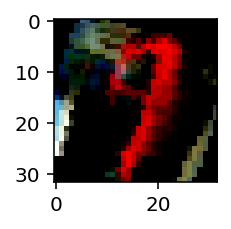

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


bird


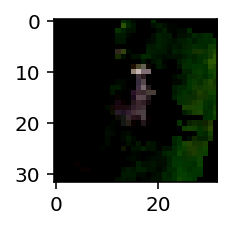

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ship


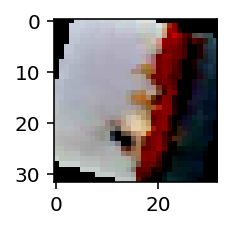

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane


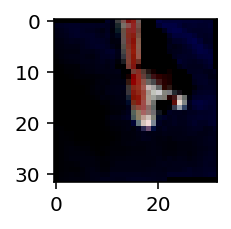

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


truck


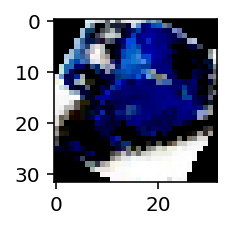

torch.Size([64, 3, 32, 32])
torch.Size([64])


In [36]:
# Explore data
## YOUR CODE HERE ##

show5(trainloader)

data_iter = iter(testloader)
images, lables = next(data_iter)

print(images.shape)
print(lables.shape)


Data Shape (one picture) 32x32 Pictures with RGB Color (3 channel)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset. 
Feel free to construct a model of any architecture – feedforward, convolutional, or even something more advanced!

In [57]:

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(3072, 2048)
        self.layer2 = nn.Linear(2048, 1024)
        self.layer3 = nn.Linear(1024, 512)
        self.layer4 = nn.Linear(512, 256)
        self.layer5 = nn.Linear(256, 128)
        self.layer6 = nn.Linear(128, 64)
        self.layer7 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = F.relu(self.layer5(x))
        x = F.relu(self.layer6(x))
        x = F.log_softmax(self.layer7(x), dim=1)
        return x


### for transfer-learning with densenet121

In [58]:
from torchvision import models

model_transfer = models.densenet121(pretrained=True)

for param in model_transfer.parameters():
    param.requires_grad = False

classifier_transfer = nn.Sequential(nn.Linear(1024, 512),
                                     nn.ReLU(),
                                     # nn.Dropout(0.2),
                                     nn.Linear(512, 10),
                                     nn.LogSoftmax(dim=1))

model_transfer.classifier = classifier_transfer


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

Loss function and optimizer for transfer-learning

In [59]:
if transfer_learning:
    model = model_transfer
    criterion = nn.NLLLoss()
    optimizer = optim.Adam(model.classifier.parameters(), lr=0.003)
    epochs = 7
else:
    model = Classifier()
    criterion = nn.NLLLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.003)
    epochs = 20

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss during each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

The negative-likelihood-loss ( nn.NLLLoss() ) is used because log_softmax is used as activation function for the final layer.

In [60]:
## YOUR CODE HERE ##

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = 'cpu'
print(device)
#print (model)

model.to(device)

train_loss_list, test_loss_list  = [], []  

for epoch in range(epochs):
    model.train()
    train_loss=0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        logps = model.forward(images)
        loss = criterion(logps, labels)     
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss_list.append(train_loss/len(trainloader))
    test_loss = 0
    accuracy = 0
    with torch.no_grad():
        model.eval()
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            logps = model.forward(images)
            loss = criterion(logps, labels)
            test_loss += loss.item()
            ps = torch.exp(logps)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor))
        
    test_loss_list.append(test_loss/len(testloader))
    print(f"Epoch {epoch+1}/{epochs}.. "
          f"Train loss: {train_loss/len(trainloader):.3f}.. "
          f"Test loss: {test_loss/len(testloader):.3f}.. "
          f"Test accuracy: {accuracy/len(testloader):.3f}")

cuda
Epoch 1/7.. Train loss: 0.975.. Test loss: 0.717.. Test accuracy: 0.753
Epoch 2/7.. Train loss: 0.830.. Test loss: 0.741.. Test accuracy: 0.747
Epoch 3/7.. Train loss: 0.785.. Test loss: 0.668.. Test accuracy: 0.778
Epoch 4/7.. Train loss: 0.772.. Test loss: 0.646.. Test accuracy: 0.788
Epoch 5/7.. Train loss: 0.754.. Test loss: 0.739.. Test accuracy: 0.762
Epoch 6/7.. Train loss: 0.745.. Test loss: 0.643.. Test accuracy: 0.786
Epoch 7/7.. Train loss: 0.731.. Test loss: 0.716.. Test accuracy: 0.762


Plot the training loss (and validation loss/accuracy, if recorded).

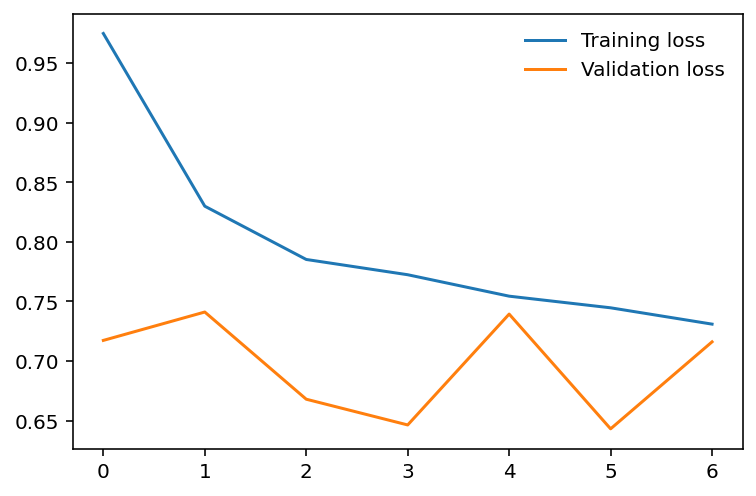

In [61]:
## YOUR CODE HERE ##
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_loss_list, label='Training loss')
plt.plot(test_loss_list, label='Validation loss')
plt.legend(frameon=False)

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 70%, great work! 
This is a hard task to exceed 70% on.

If your accuracy is under 45%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [62]:
## YOUR CODE HERE ##
test_loss = 0
accuracy = 0
model.eval()
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        logps = model.forward(images)
        loss = criterion(logps, labels)
        test_loss += loss.item()
        ps = torch.exp(logps)
        
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
    
    print(f"Test loss: {test_loss/len(testloader):.3f}")
    print(f"Test accuracy: {accuracy/len(testloader)*100:.2f}%")

Test loss: 0.717
Test accuracy: 76.10%


## Saving your model
Using `torch.save`, save your model for future loading.

In [63]:
## YOUR CODE HERE ##
file_name ='checkpoint_transfer_3'
torch.save(model.state_dict(), file_name + 'pth')

## Make a Recommendation

Based on your evaluation, what is your recommendation on whether to build or buy? Explain your reasoning below.

With Transfer-Learning (with the base-model densenet121) we can reach an test-accuracy of 76% after 7 Epochs. With a longer learning over more epochs maybe a better result is possible. So I would suggest to use the own solution based on transfer-learning and not to buy the solution.